입력 이미지로 사용될 이미지 다운로드

In [1]:
!mkdir ./data
!wget -O ./data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg

--2022-06-21 08:10:35--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘./data/beatles01.jpg’

./data/beatles01.jp 100%[===================>] 374.14K  --.-KB/s    in 0.01s   

2022-06-21 08:10:35 (29.4 MB/s) - ‘./data/beatles01.jpg’ saved [383118/383118]



원하는 모델명은 TF Hub에서 검색해서 hub.lod()로 다운로드

In [2]:
import tensorflow_hub as hub
model_path="https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2"

model=hub.load(model_path)

입력 이미지 값으로 numpy array를 사용하여 detector_model에 인자로 입력하여 inference 수행. 

In [15]:
import cv2
import numpy as np
import time
# (1) array로 이미지를입력
# 여러개의 이미지가 들어올 수 있기 때문에  detector_model()는 4차원 이미지가 들어가야한다 
img_array=cv2.imread("/content/data/beatles01.jpg")
img_array_dims=np.expand_dims(img_array,axis=0)
print(img_array_dims.shape)

start_time=time.time()
result = model(img_array_dims)
print("inference time :",time.time() - start_time)

(1, 633, 806, 3)
inference time : 0.04986214637756348


입력 이미지 값으로 tensor 를 사용하여 detector_model에 인자로 입력하여 inference 수행. 

In [27]:
import time
import tensorflow as tf
import cv2
# (2) tensor로 이미지를 입력 
img_tensor = tf.convert_to_tensor(img_array, dtype=tf.uint8)[tf.newaxis, ...]
print(img_tensor.shape)

start_time=time.time()
# 위와 같이 array를 넣으면 알아서 tensor로 바뀐다 
result=model(img_tensor)
print("inference time :",time.time()-start_time)

(1, 633, 806, 3)
inference time : 0.05662965774536133


In [19]:
# 개별적인 value의 값들은 tensor이다 
for k,v in result.items():
  print(k)
  print("type :",type(v),"\n")

num_detections
type : <class 'tensorflow.python.framework.ops.EagerTensor'> 

detection_multiclass_scores
type : <class 'tensorflow.python.framework.ops.EagerTensor'> 

detection_classes
type : <class 'tensorflow.python.framework.ops.EagerTensor'> 

raw_detection_scores
type : <class 'tensorflow.python.framework.ops.EagerTensor'> 

raw_detection_boxes
type : <class 'tensorflow.python.framework.ops.EagerTensor'> 

detection_boxes
type : <class 'tensorflow.python.framework.ops.EagerTensor'> 

detection_anchor_indices
type : <class 'tensorflow.python.framework.ops.EagerTensor'> 

detection_scores
type : <class 'tensorflow.python.framework.ops.EagerTensor'> 



In [18]:
result["num_detections"]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([100.], dtype=float32)>

In [20]:
# bounding box 좌표는 ymin, xmin, ymax, xmax 순서로 반환됨.
# y가 먼저, x가 나중에 나오므로 반드시 주의해야 함. 
result["detection_boxes"]

<tf.Tensor: shape=(1, 100, 4), dtype=float32, numpy=
array([[[0.41495627, 0.4789078 , 0.8861094 , 0.6805986 ],
        [0.35446185, 0.6193308 , 0.45601124, 0.7103389 ],
        [0.42462415, 0.07202519, 0.8726056 , 0.24962677],
        [0.34840307, 0.57042307, 0.4265056 , 0.6450172 ],
        [0.351907  , 0.49550375, 0.37206447, 0.51862085],
        [0.43273562, 0.2820462 , 0.8654354 , 0.45395404],
        [0.3487833 , 0.5463882 , 0.37784773, 0.5763231 ],
        [0.3735987 , 0.38559082, 0.41415024, 0.42749032],
        [0.3549313 , 0.45743853, 0.3715493 , 0.4719668 ],
        [0.3873283 , 0.16212597, 0.54663444, 0.31490028],
        [0.35574898, 0.53846586, 0.41043958, 0.595577  ],
        [0.35995895, 0.74961007, 0.4518572 , 0.80073214],
        [0.41962263, 0.37767807, 0.49098232, 0.41628668],
        [0.40850347, 0.6971656 , 0.8881627 , 0.8754239 ],
        [0.37630147, 0.8410377 , 0.4158867 , 0.88230294],
        [0.3869046 , 0.8088866 , 0.42234337, 0.8531973 ],
        [0.35546145

In [21]:
result["detection_classes"]

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[ 1.,  3.,  1.,  3.,  3.,  1.,  3.,  3.,  3.,  3.,  3.,  3.,  1.,
         1.,  3.,  3.,  3.,  3.,  3.,  1.,  3.,  8.,  1.,  4.,  1.,  3.,
         3.,  3.,  1.,  1.,  1.,  1.,  3.,  1.,  1.,  1.,  1.,  2.,  1.,
         1., 41., 15., 15.,  9.,  1.,  3.,  3.,  1.,  1., 15.,  4.,  1.,
         1., 15.,  1., 28., 37.,  8.,  1.,  3.,  4., 10.,  3.,  8.,  1.,
         1.,  3.,  1.,  1., 31.,  9.,  3.,  1.,  1.,  8.,  3.,  1.,  3.,
         1., 31., 15.,  1., 31.,  3.,  1.,  1.,  3.,  1.,  1., 37.,  4.,
        10., 31., 31.,  3.,  1.,  1.,  8.,  1., 34.]], dtype=float32)>

In [22]:
result["detection_scores"]

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[0.80172944, 0.7356188 , 0.7120171 , 0.69413865, 0.6636528 ,
        0.65565026, 0.6452407 , 0.603727  , 0.6026705 , 0.5842154 ,
        0.56527376, 0.5350405 , 0.5342654 , 0.5268757 , 0.52053607,
        0.5095628 , 0.4978297 , 0.4945502 , 0.4944435 , 0.4815372 ,
        0.4632207 , 0.44348982, 0.43932405, 0.43850383, 0.4356333 ,
        0.4294043 , 0.4046916 , 0.40248072, 0.4004219 , 0.38804975,
        0.379697  , 0.37923127, 0.3572933 , 0.35150284, 0.3513087 ,
        0.34515974, 0.34445184, 0.3431205 , 0.3409394 , 0.3407754 ,
        0.33898056, 0.33623496, 0.3346396 , 0.32812485, 0.32567793,
        0.3254129 , 0.32011735, 0.3194379 , 0.31624943, 0.31623927,
        0.31335816, 0.31307578, 0.3130087 , 0.30830538, 0.30543134,
        0.30098662, 0.29714978, 0.2968763 , 0.2904769 , 0.2894469 ,
        0.2890264 , 0.28901452, 0.2870647 , 0.28292787, 0.2803842 ,
        0.27541226, 0.27536196, 0.27475467, 0.2743941 , 0.27360827

In [23]:
result_keys=["num_detections","detection_boxes","detection_classes","detection_scores"]
# detect 결과는 100개를 기본으로 Detect 함
for k in result_keys:
  print("{} shape : {}".format(k,result[k].shape))

# detection_boxes는 bounding box 좌표값
# (1,100,4) => 3차원으로 들어온다 
# 1은 이미지의 개수
# 100은 object의 개수 
# 4는 좌표값
# [좌표값에서 주의 할 점]
# ymin,xmin,ymax,xmax (y먼저 나온다 )

# detection_classess는 bounding box의 classes 즉, object의 class
# (1,100)
# 1은 이미지의 개수
# 100은 detection classes 즉, object의 class

# num_detections
# (1,)

# detection_scores는 class confience socre
# (1,100)
# 이미지 한장에 대한 100개의 object class confidence score

num_detections shape : (1,)
detection_boxes shape : (1, 100, 4)
detection_classes shape : (1, 100)
detection_scores shape : (1, 100)


inference 결과를 이미지로 시각화

In [24]:
labels_to_names = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                    11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                    21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                    31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                    41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                    51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                    61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                    71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                    81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                    91:'hair brush'}

person : 0.8017
car : 0.7356
person : 0.7120
car : 0.6941
car : 0.6637
person : 0.6557
car : 0.6452
car : 0.6037
car : 0.6027
car : 0.5842
car : 0.5653
car : 0.5350
person : 0.5343
person : 0.5269
car : 0.5205
car : 0.5096


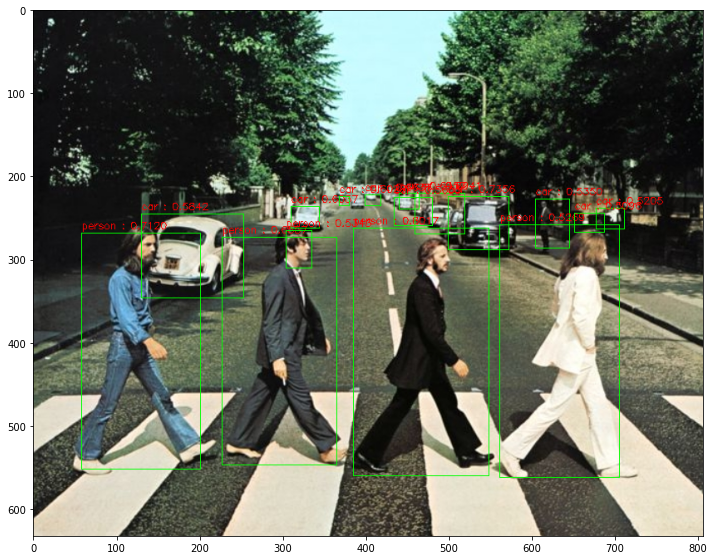

In [28]:
# ["num_detections","detection_boxes","detection_classes","detection_scores"]

import matplotlib.pyplot as plt


result=model(img_tensor)
result={k : np.array(v) for k,v in result.items()}

draw_img=img_array.copy()

height,width=img_array.shape[:2]

for i in range(min(result["detection_scores"][0].shape[0],100)):
  score=result["detection_scores"][0,i]
  if score<0.5:
    break

  box=result["detection_boxes"][0,i]

  left=int(box[1]*width)
  top=int(box[0]*height)
  right=int(box[3]*width)
  bottom=int(box[2]*height)

  class_id=result["detection_classes"][0,i]

  caption="{} : {:.4f}".format(labels_to_names[class_id],score)
  print(caption)

  cv2.rectangle(draw_img,(left,top),(right,bottom),color=(0,255,0),thickness=1)
  cv2.putText(draw_img,caption,(left,top-5),cv2.FONT_HERSHEY_SIMPLEX,0.4,(0,0,255),1)

draw_img=cv2.cvtColor(draw_img,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,14))
plt.imshow(draw_img)

In [40]:
# 함수화

def get_detected_img(img_array,model,score_threshold,is_print):

  draw_img=img_array.copy()

  height,width=img_array.shape[:2]

  img_tensor=tf.convert_to_tensor(img_array)[tf.newaxis,...]

  start_time = time.time()
  result=model(img_tensor)
  result={k : np.array(v) for k,v in result.items()}

  for i in range(min(result["detection_scores"][0].shape[0],100)):
    score=result["detection_scores"][0,i]
    if score<score_threshold:
      break

    box=result["detection_boxes"][0,i]

    left=int(box[1]*width)
    top=int(box[0]*height)
    right=int(box[3]*width)
    bottom=int(box[2]*height)

    class_id=result["detection_classes"][0,i]

    caption="{} : {:.4f}".format(labels_to_names[class_id],score)
    print(caption)

    cv2.rectangle(draw_img,(left,top),(right,bottom),color=(0,255,0),thickness=2)
    cv2.putText(draw_img,caption,(left,top-5),cv2.FONT_HERSHEY_SIMPLEX,0.6,(255,0,0),1)
  
  if is_print:
    print('Detection 수행시간:',round(time.time() - start_time, 2),"초")

  return draw_img

In [32]:
!wget -O ./data/image.png https://raw.githubusercontent.com/HyeBin-Hub/Lesson-Object_Detection/main/images/image.png

--2022-06-21 08:50:26--  https://raw.githubusercontent.com/HyeBin-Hub/Lesson-Object_Detection/main/images/image.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1217665 (1.2M) [image/png]
Saving to: ‘./data/image.png’

./data/image.png    100%[===================>]   1.16M  --.-KB/s    in 0.02s   

2022-06-21 08:50:27 (63.0 MB/s) - ‘./data/image.png’ saved [1217665/1217665]



In [33]:
img=cv2.cvtColor(cv2.imread("/content/data/image.png"),cv2.COLOR_BGR2RGB)

# model_path="https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2"
# model=hub.load(model_path)

car : 0.8157
person : 0.7710
person : 0.6648
person : 0.6122
bicycle : 0.5994
person : 0.5819
Detection 수행시간: 0.06 초


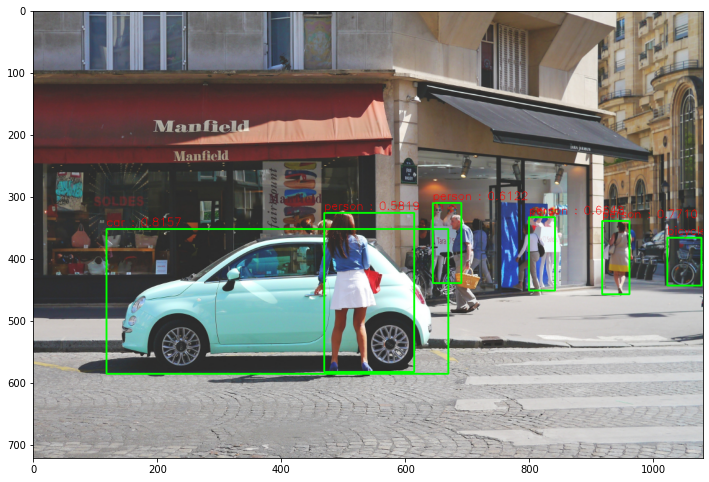

In [43]:
draw_img = get_detected_img(img,model,0.55,True)

plt.figure(figsize=(12,12))
plt.imshow(draw_img)

Video Inference 수행

In [44]:
!wget -O ./data/Airport.mp4 https://github.com/HyeBin-Hub/Lesson-Object_Detection/blob/main/videos/Airport.mp4?raw=true

--2022-06-21 09:04:31--  https://github.com/HyeBin-Hub/Lesson-Object_Detection/blob/main/videos/Airport.mp4?raw=true
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/HyeBin-Hub/Lesson-Object_Detection/raw/main/videos/Airport.mp4 [following]
--2022-06-21 09:04:31--  https://github.com/HyeBin-Hub/Lesson-Object_Detection/raw/main/videos/Airport.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/HyeBin-Hub/Lesson-Object_Detection/main/videos/Airport.mp4 [following]
--2022-06-21 09:04:32--  https://raw.githubusercontent.com/HyeBin-Hub/Lesson-Object_Detection/main/videos/Airport.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githu

In [54]:
def get_detected_video(model,input_video_path,output_detected_video_path,score_threshold=0.5):

  cap=cv2.VideoCapture(input_video_path)

  codec=cv2.VideoWriter_fourcc(*"XVID")

  video_fps=cap.get(cv2.CAP_PROP_FPS)

  video_size=(round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))

  video_write=cv2.VideoWriter(output_detected_video_path,codec,video_fps,video_size)

  while 1:
    hasFrame,ImgFrame=cap.read()
    if not hasFrame:
      print("더 이상 처리할 Frame이 없습니다 ")
      break

    ImgFrame=get_detected_img(ImgFrame,model,score_threshold,True)
    video_write.write(ImgFrame)

  cap.release()
  video_write.release()

In [53]:
!wget -O ./data/Airport.mp4 https://github.com/HyeBin-Hub/Lesson-Object_Detection/blob/main/videos/Airport.mp4?raw=true

--2022-06-21 09:06:44--  https://github.com/HyeBin-Hub/Lesson-Object_Detection/blob/main/videos/Airport.mp4?raw=true
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/HyeBin-Hub/Lesson-Object_Detection/raw/main/videos/Airport.mp4 [following]
--2022-06-21 09:06:45--  https://github.com/HyeBin-Hub/Lesson-Object_Detection/raw/main/videos/Airport.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/HyeBin-Hub/Lesson-Object_Detection/main/videos/Airport.mp4 [following]
--2022-06-21 09:06:45--  https://raw.githubusercontent.com/HyeBin-Hub/Lesson-Object_Detection/main/videos/Airport.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githu

In [55]:
get_detected_video(model,
                   "/content/data/Airport.mp4",
                   "/content/data/Airport_out.mp4",
                   score_threshold=0.5)

airplane : 0.5211
Detection 수행시간: 0.05 초
airplane : 0.5322
Detection 수행시간: 0.05 초
airplane : 0.5255
airplane : 0.5002
Detection 수행시간: 0.05 초
airplane : 0.5253
Detection 수행시간: 0.06 초
airplane : 0.5196
airplane : 0.5025
Detection 수행시간: 0.05 초
airplane : 0.5175
person : 0.5139
Detection 수행시간: 0.05 초
person : 0.5195
airplane : 0.5185
Detection 수행시간: 0.05 초
airplane : 0.5170
person : 0.5157
Detection 수행시간: 0.05 초
airplane : 0.5147
person : 0.5029
Detection 수행시간: 0.05 초
airplane : 0.5166
Detection 수행시간: 0.05 초
airplane : 0.5165
Detection 수행시간: 0.05 초
airplane : 0.5167
person : 0.5040
Detection 수행시간: 0.06 초
airplane : 0.5091
Detection 수행시간: 0.06 초
airplane : 0.5826
person : 0.5260
airplane : 0.5154
Detection 수행시간: 0.05 초
person : 0.5282
airplane : 0.5089
airplane : 0.5036
Detection 수행시간: 0.05 초
airplane : 0.6247
person : 0.5307
airplane : 0.5076
Detection 수행시간: 0.05 초
airplane : 0.5935
person : 0.5302
airplane : 0.5015
Detection 수행시간: 0.05 초
airplane : 0.5367
person : 0.5266
airplane : 0.5055